# Математическая статистика
## Практическое задание 2

В данном задании рассматриваются различные свойства оценок, методы получения оценок, способы сравнения оценок.

**Правила:**

* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 2"`. Квадратные скобки обязательны. Вместо `Фамилия Имя` нужно подставить свои фамилию и имя.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `2.N.ipynb` и `2.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Никакой код из данного задания при проверке запускаться не будет.
* Некоторые задачи отмечены символом <font size="5" color="red">\*</font>. Эти задачи являются дополнительными. Успешное выполнение большей части таких задач (за все задания) является необходимым условием получения бонусного балла за практическую часть курса.
* Баллы за каждую задачу указаны далее. Если сумма баллов за задание меньше 25% (без учета доп. задач), то все задание оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 - 3 балла
* Задача 2 - 3 балла
* Задача 3 - 3 балла
* Задача 4 - 2 балла
* Задача 5 - 2 балла
* Задача 6 - 3 балла
* Задача 7а - 3 балла
* Задача 7b<font size="5" color="red">\*</font> - 5 баллов
* Задача 8 - 4 балла
* Задача 9<font size="5" color="red">\*</font> - 4 балла
* Задача 10<font size="5" color="red">\*</font> - 5 баллов


При выполнении задания рекомендуется пользоваться библиотекой `scipy.stats`. Подробное описание есть в наших инструкциях.

In [175]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

**Задача 1.** В этой задаче нужно визуализировать свойство несмещенности.

Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Известно, что в качестве оценки параметра $\theta$ можно использовать следующие оценки $X_{(n)}, \frac{n+1}{n}X_{(n)}, 2\overline{X}$.

**Вопрос:** Какие из этих оценок являются несмещенными?

**Ответ:** $\frac{n+1}{n}X_{(n)}, 2\overline{X}$

Вам нужно убедиться в этом, сгенерировав множество выборок и посчитав по каждой из них оценку параметра.

Сгенерируйте 500 выборок $X_1^j, ..., X_n^j$ из распределения $U[0, 1]$, по каждой из них посчитайте оценку $\widehat{\theta}_j$, получив тем самым 500 независимых оценок параметра. Нанесите их на график с одинаковой *у*-координатой. Отметьте специальным символом среднее этих выборок (см. шаблон ниже). Выполните данную процедуру для $n \in \{10, 100, 500\}$.

Для нанесения точек на график используйте следующий шаблон. Для каждой оценки выставите разный *уровень*, чтобы реализации разных оценок не слипались. В качестве *метки* используйте latex-код этой оценки, который можно взять выше в условии этой задачи. Постарайтесь не размножать код, а сделать циклы по типам оценок и по размеру выборки. Естественно, все типы оценок должны быть на одном графике, но для разных $n$ должны быть разные графики.

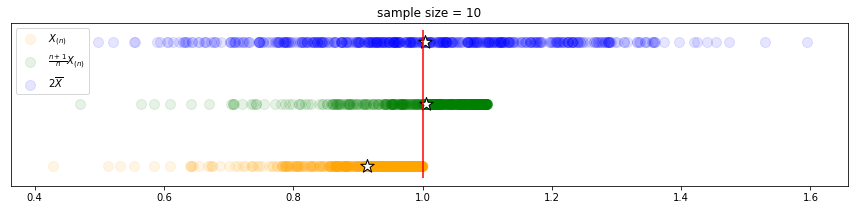

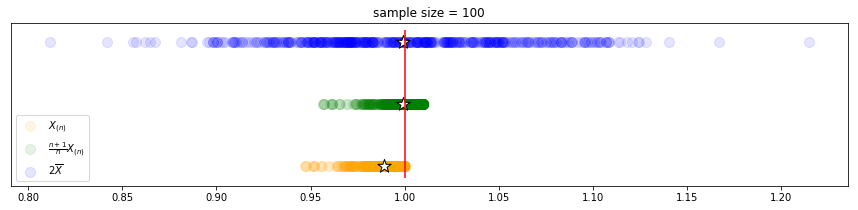

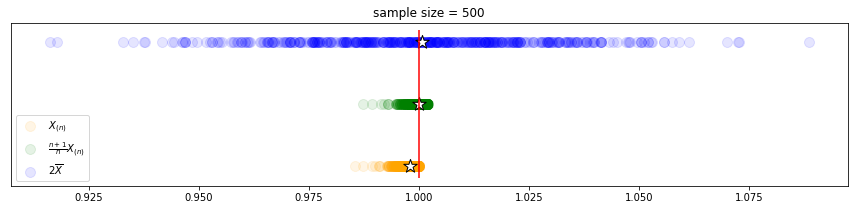

In [176]:
sizes = [10, 100, 500]
levels = [0, 0.25, 0.5]
colors = ['orange', 'green', 'blue']
labels = ['$X_{(n)}$', '$\\frac{n+1}{n}X_{(n)}$', '$2\\overline{X}$']

for size in sizes:
    sample = sps.uniform.rvs(size=(500, size))
    estims = [np.max(sample, axis=1), (size + 1) / size * np.max(sample, axis=1), 2 * sample.mean(axis=1)]

    plt.figure(figsize=(15, 3))
    for estim, level, color, label in zip(estims, levels, colors, labels):
        plt.scatter(estim, np.zeros_like(estim) + level, alpha=0.1, s=100, color=color, label=label)
        plt.scatter(estim.mean(), level, marker='*', s=200, color='w', edgecolors='black')
    
    plt.vlines(1, -0.05, 0.55, color='r')
    plt.title('sample size = %d' % size)
    plt.yticks([])
    plt.legend()
    plt.show()

Пусть теперь $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(0, \sigma^2)$. Известно, что в качестве оценки параметра $\sigma^2$ можно использовать следующие оценки $S^2, \frac{n}{n-1}S^2$.

**Вопрос:** Какие из этих оценок являются несмещенными?

**Ответ:** $\frac{n}{n-1}S^2$

Для данной модели выполните те же действия, что и с предыдущей.

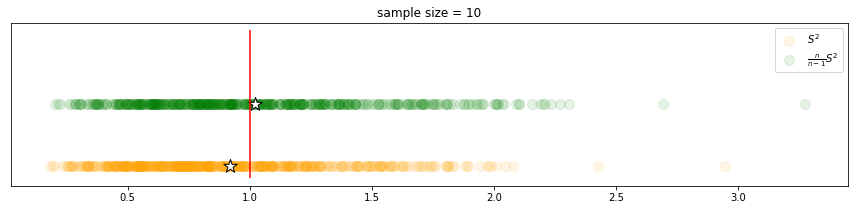

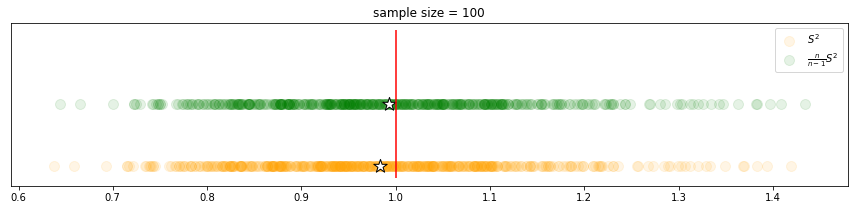

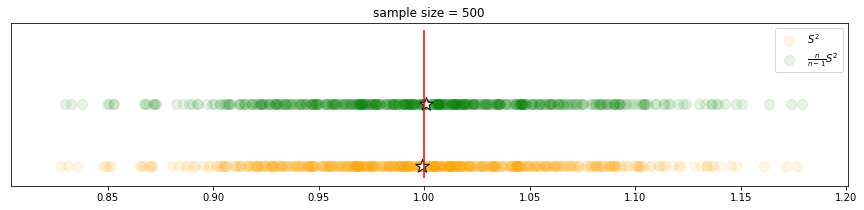

In [177]:
sizes = [10, 100, 500]
levels = [0, 0.25, 0.5]
colors = ['orange', 'green', 'blue']
labels = ['$S^2$', '$\\frac{n}{n-1}S^2$']

scale = 1
for size in sizes:
    sample = sps.norm.rvs(loc=0, scale=scale, size=(500, size))
    estims = [sample.var(axis=1), size / (size - 1) * sample.var(axis=1)]

    plt.figure(figsize=(15, 3))
    for estim, level, color, label in zip(estims, levels, colors, labels):
        plt.scatter(estim, np.zeros_like(estim) + level, alpha=0.1, s=100, color=color, label=label)
        plt.scatter(estim.mean(), level, marker='*', s=200, color='w', edgecolors='black')
    
    plt.vlines(1, -0.05, 0.55, color='r')
    plt.title('sample size = %d' % size)
    plt.yticks([])
    plt.legend()
    plt.show()   

Сделайте вывод о том, что такое свойство несмещенности. Подтверждают ли сделанные эксперименты свойство несмещенности данных оценок? Поясните, почему в лабораторных по физике при оценке погрешности иногда используют $n-1$ в знаменателе, а не $n$.

**Вывод:** оценка параметра называется несмещенной, если математическое ожидание оценки равно самому параметру.
Проведенные эксперименты, действительно, наглядно демонмтрируют справедливость этого свойства, так как среднее значение именно несмещенных оценок довольно близко к истинному значению параметра, в отличие от смещенных. Разумеется, с увеличением размера выборки это становится более наглядным.
В лабораторных по физике мы обычно считаем сумму по i $({X_{i}-\overline{X}})^ 2$ (обозначим её за $M$) и делим её на n-1. Получается, $M = n S^2$. Тогда, чтобы получить несмещенную оценку вида $\frac{n}{n-1}S^2$, остается просто разделить $M$ на (n-1).

**Задача 2.** В этой задаче нужно визуализировать свойство состоятельности.

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(\theta, 1)$. Известно, что $\overline{X}$ является состоятельной оценкой параметра $\theta$. Вам нужно убедиться в этом, сгенерировав множество выборок и посчитав по каждой из них оценку параметра в зависимости от размера выборки.

Сгенерируйте 200 выборок $X_1^j, ..., X_{300}^j$ из распределения $\mathcal{N}(0, 1)$. По каждой из них посчитайте оценки $\widehat{\theta}_{jn} = \frac{1}{n}\sum\limits_{i=1}^n X_i^j$ для $1 \leqslant n \leqslant 300$, то есть оценка параметра по первым $n$ наблюдениям $j$-й выборки. При написании кода может помочь вступительное задание.

Для каждого $j$ нанесите на один график зависимость $\widehat{\theta}_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.2`. Поскольку при малых $n$ значения оценок могут быть большими, ограничьте область графика по оси *y* с помощью функции `plt.ylim((min, max))`.

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Известно, что $X_{(n)}$ является состоятельной оценкой параметра $\theta$. Выполните исследование, аналогичное пункту *a)*, сгенерировав выборки из распределения $U[0, 1]$ и посчитав оценки $\widehat{\theta}_{jn} = \max\limits_{i=1...n}X_i^j$.

Сделайте вывод о том, что такое свойство состоятельности. Подтверждают ли сделанные эксперименты свойство состоятельности данных оценок? Как связаны результаты в пункте *a)* с законом больших чисел?

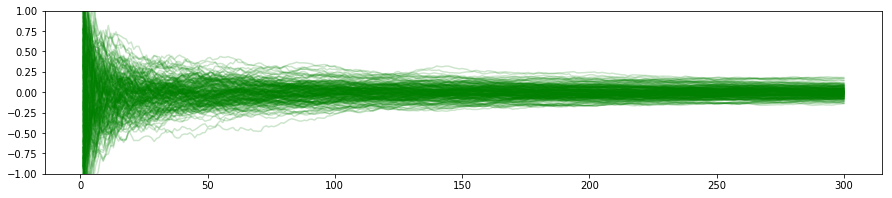

In [178]:
plt.figure(figsize=(15, 3))

sample = sps.norm.rvs(loc=0, scale=1, size=(200, 300))
cum_sums = sample.cumsum(axis=1) 
for n in range(300):
    for i in range(200):
        cum_sums[i][n] = cum_sums[i][n] / (n + 1)
        
for i in range(200):
    plt.plot(np.arange(1, 301), cum_sums[i], alpha=0.2, color = 'green')
plt.ylim((-1, 1))
plt.show()

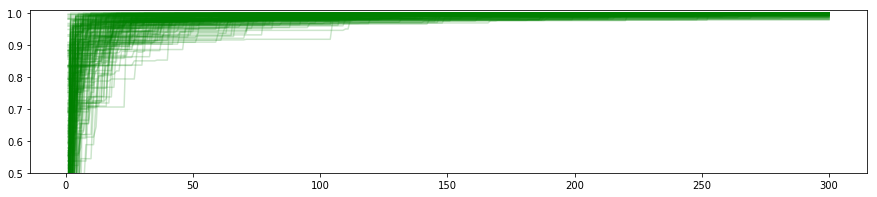

In [179]:
plt.figure(figsize=(15, 3))

sample = sps.uniform.rvs(size=(200, 300))
cum_maxs = np.empty(shape=(200, 300))
for n in range(300):
    for i in range(200):
        cum_maxs[i][n] = sample[i][0:n + 1].max()
        
for i in range(200):
    plt.plot(np.arange(1, 301), cum_maxs[i], alpha=0.2, color='green')
plt.ylim((0.5, 1.01))
plt.show()

Вывод: оценка параметра называется состоятельной, если она сходится по вероятности к оцениваемому параметру. На построенных графиках хорошо видно, как с увеличением размера выборки оценка всё сильнее стремится к истинному параметру. В пункте а) мы видим, что при увеличении n выборочное среднее стремится к мат. ожиданию. Как раз об этом нам говорит Закон больших чисел.

**Задача 3.** В этой задаче нужно визуализировать свойство асимптотической нормальности.

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(\theta, 1)$. Известно, что $\overline{X}$ является асимптотически нормальной оценкой параметра $\theta$. Вам нужно убедиться в этом, сгенерировав множество выборок и посчитав по каждой из них оценку параметра в зависимости от размера выборки.

Сгенерируйте 200 выборок $X_1^j, ..., X_{300}^j$ из распределения $\mathcal{N}(0, 1)$. По каждой из них посчитайте оценки $\widehat{\theta}_{jn} = \frac{1}{n}\sum\limits_{i=1}^n X_i^j$ для $1 \leqslant n \leqslant 300$, то есть оценка параметра по первым $n$ наблюдениям $j$-й выборки. Для этой оценки посчитайте статистику $T_{jn} = \sqrt{n} \left( \widehat{\theta}_{jn} - \theta \right)$, где $\theta = 0$.

Для каждого $j$ нанесите на один график зависимость $T_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.2`. Сходятся ли значения $T_{jn}$ к какой-либо константе?

Для $n=300$ по выборке $T_{1,300}, ..., T_{200,300}$ постройте гистограмму и ядерную оценку плотности. Хорошо ли они приближают плотность распределения $\mathcal{N}(0, 1)$ (ее тоже постройте на том же графике)? Не забудьте сделать легенду.

In [180]:
from statsmodels.nonparametric.kde import KDEUnivariate

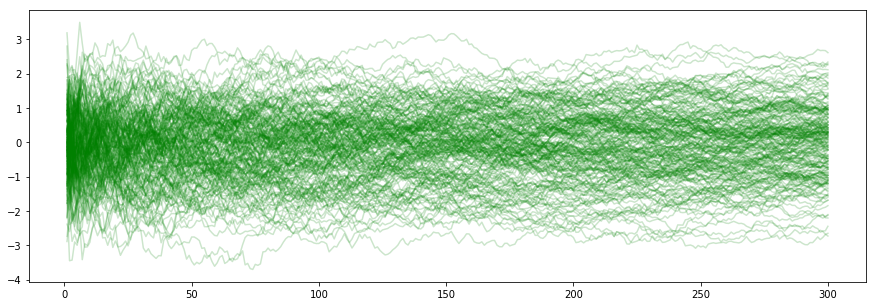

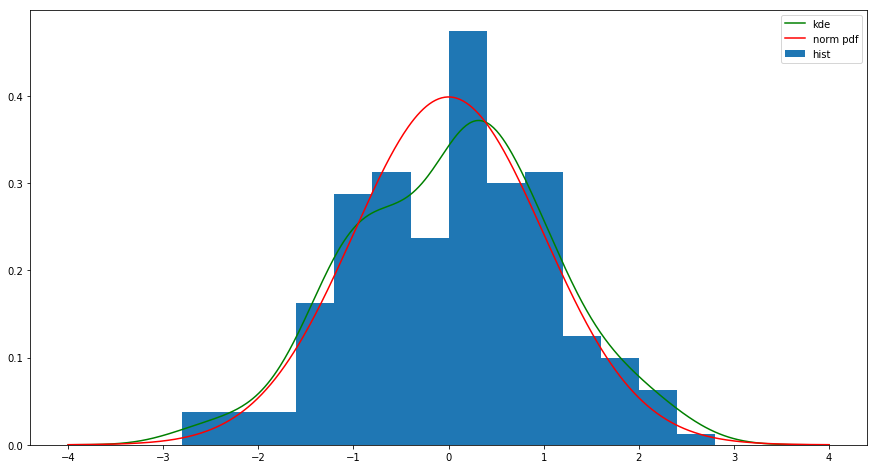

In [181]:
plt.figure(figsize=(15, 5))

theta = 0
sample = sps.norm.rvs(loc=0, scale=1, size=(200, 300))
cum_sums = sample.cumsum(axis=1)
T_jn = np.empty(shape=(200,300))

for n in range(300):
    for j in range(200):
        theta_jn = cum_sums[j][n] / (n+1)
        T_jn[j][n] = (theta_jn - theta) * (n+1) ** 0.5
        
for j in range(200):
    plt.plot(np.arange(1, 301), T_jn[j], alpha=0.2, color='green')

plt.show()

# рисуем гистограмму
plt.figure(figsize=(15, 8))
grid = np.linspace(-4, 4, 500)

T_j_300 = T_jn[:, 299]
plt.hist(T_j_300, bins=20, range=(grid.min(), grid.max()), normed=True, label='hist')

kernel_density = KDEUnivariate(T_j_300)
kernel_density.fit()
plt.plot(grid, kernel_density.evaluate(grid), color='green', label='kde')

plt.plot(grid, sps.norm.pdf(grid, loc=0, scale=1), color='red', label='norm pdf')

plt.legend()
plt.show()

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $Pois(\theta)$. Известно, что $\overline{X}$ является асимптотически нормальной оценкой параметра $\theta$. Выполните исследование, аналогичное пункту *a)*.

Сделайте вывод о том, что такое свойство асимптотической нормальности. Подтверждают ли сделанные эксперименты свойство асимптотической нормальности данных оценок? Как связаны результаты с центральной предельной теоремой?

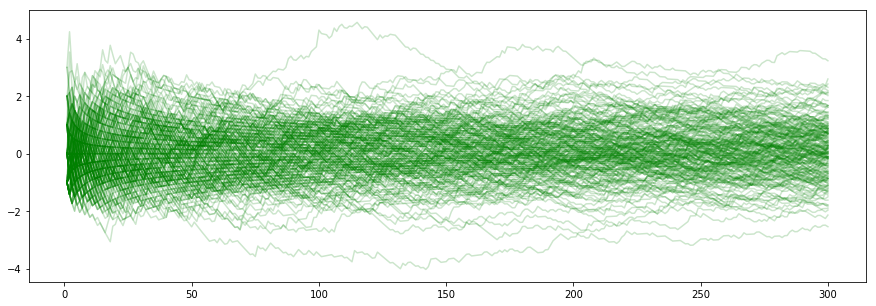

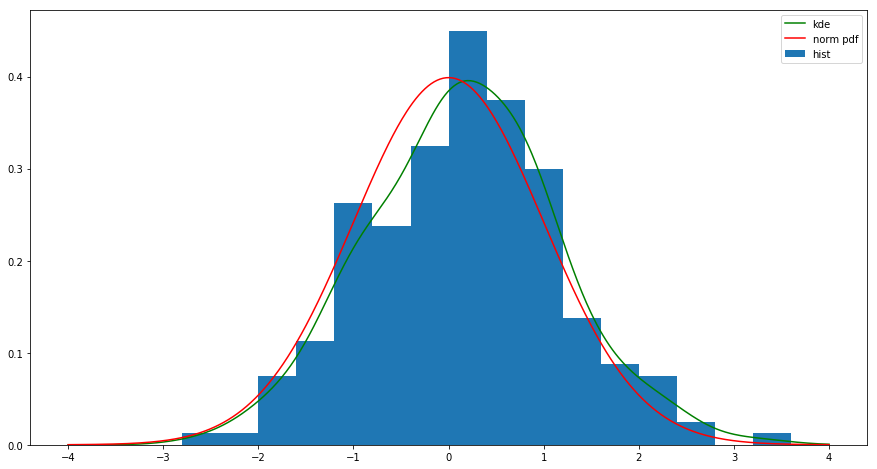

In [182]:
plt.figure(figsize=(15, 5))

theta = 1
sample = sps.poisson.rvs(mu=theta, size=(200, 300))
cum_sums = sample.cumsum(axis=1)
T_jn = np.empty(shape=(200,300))

for n in range(300):
    for j in range(200):
        theta_jn = cum_sums[j][n] / (n+1)
        T_jn[j][n] = (theta_jn - theta) * (n+1) ** 0.5
        
for j in range(200):
    plt.plot(np.arange(1, 301), T_jn[j], alpha=0.2, color='green')

plt.show()

# рисуем гистограмму
plt.figure(figsize=(15, 8))
grid = np.linspace(-4, 4, 500)

T_j_300 = T_jn[:, 299]
plt.hist(T_j_300, bins=20, range=(grid.min(), grid.max()), normed=True, label='hist')

kernel_density = KDEUnivariate(T_j_300)
kernel_density.fit()
plt.plot(grid, kernel_density.evaluate(grid), color='green', label='kde')

plt.plot(grid, sps.norm.pdf(grid, loc = 0, scale = 1), color='red', label='norm pdf')

plt.legend()
plt.show()

Вывод: оценка параметра называется ассимтотически номральной оценкой (АНО) , если разность оценки и параметра, умноженная на корень из размера выборки, стремится по распределению к некоторой случайной величине ξ ∼ $\mathcal{N}(0, \sigma^2(\theta))$, где $\sigma^2(\theta)$ -- ассимптотическая дисперсия оценки. В наших задачах $\sigma^2(\theta) = 1$, и на графиках хорошо видно, что случайные величины стремятся по распределению к $\mathcal{N}(\theta, 1)$.

**Задача 4.** Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Из домашнего задания известно, что $n\left(\theta - X_{(n)}\right) \stackrel{d_\theta}{\longrightarrow} Exp\left(1/\theta\right)$. Проведите исследование, аналогичное заданию 3 для $\theta=1$.

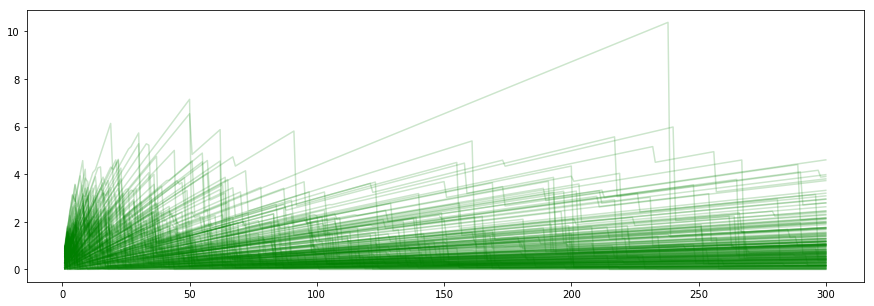

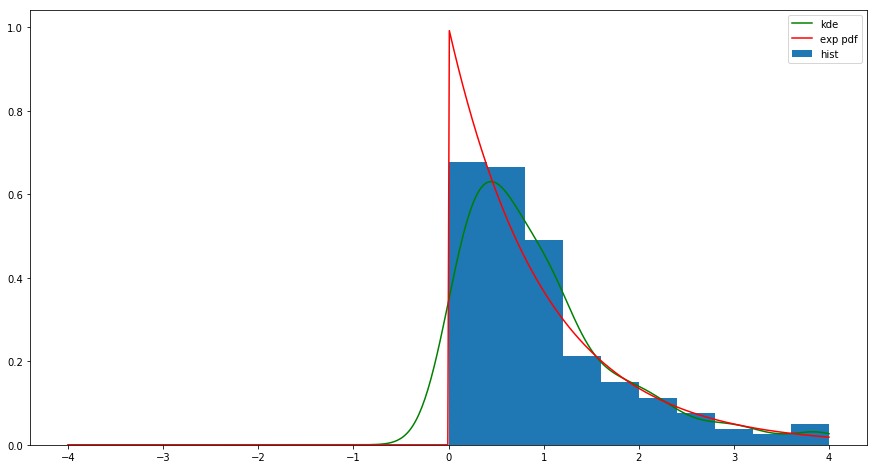

In [183]:
plt.figure(figsize=(15, 5))

theta = 1
sample = sps.uniform.rvs(size=(200, 300), loc=0, scale=theta)
cum_maxs = np.maximum.accumulate(sample, axis=1)
T_jn = np.empty(shape=(200,300))

for n in range(300):
    for j in range(200):
        T_jn[j][n] = (theta - cum_maxs[j][n]) * (n+1)
        
for j in range(200):
    plt.plot(np.arange(1, 301), T_jn[j], alpha=0.2, color='green')

plt.show()

# рисуем гистограмму
plt.figure(figsize=(15, 8))
grid = np.linspace(-4, 4, 500)

T_j_300 = T_jn[:, 299]
plt.hist(T_j_300, bins=20, range=(grid.min(), grid.max()), normed=True, label='hist')

kernel_density = KDEUnivariate(T_j_300)
kernel_density.fit()
plt.plot(grid, kernel_density.evaluate(grid), color='green', label='kde')

plt.plot(grid, sps.expon.pdf(grid, loc = 0, scale = 1), color='red', label='exp pdf')

plt.legend()
plt.show()

Вывод: из построенных графиков, действительно, видно, что случайная величина $n\left(\theta - X_{(n)}\right)$ стремится по распределению к Exp(1).

**Задача 5.** Дана параметрическая модель и несколько выборок из двух или трех наблюдений (для удобства они даются в виде python-кода). Нужно для каждой выборки построить график функции правдоподобия.

*a).* Параметрическая модель $\mathcal{N}(\theta, 1)$, выборки: [-1, 1], [-5, 5], [-1, 5]

*b).* Параметрическая модель $Exp(\theta)$, выборки: [1, 2], [0.1, 1], [1, 10]

*c).* Параметрическая модель $U[0, \theta]$, выборки: [0.2, 0.8], [0.5, 1], [0.5, 1.3]

*d).* Параметрическая модель $Bin(5, \theta)$, выборки: [0, 1], [5, 5], [0, 5]

*e).* Параметрическая модель $Pois(\theta)$, выборки: [0, 1], [0, 10], [5, 10]

*f).* Параметрическая модель $Сauchy(\theta)$, где $\theta$ --- параметр сдвига, выборки: [-0.5, 0.5], [-2, 2], [-4, 0, 4]

Выполнить задание, не создавая много кода, поможет следующая функция.

In [184]:
def draw_likelihood(density_function, grid, samples, label):
    ''' density_function --- функция, считающая плотность (обычную или дискретную)
        grid --- сетка для построения графика
        samples --- три выборки
        label --- latex-код параметрической модели
    '''
    
    plt.figure(figsize=(18, 5))
    for i, sample in enumerate(samples):
        sample = np.array(sample)[np.newaxis, :]
        likelihood = значение функции правдоподобия

        plt.subplot(1, 3, i+1)
        plt.plot(grid, likelihood)
        plt.xlabel('$\\theta$', fontsize=16)
        plt.grid(ls=':')
        plt.title(label + ', sample=' + str(sample), fontsize=16)
    plt.show()

SyntaxError: invalid syntax (<ipython-input-184-6e235e0d39cf>, line 11)

Первый пункт можно выполнить с помощью следующего кода

In [ ]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.norm(loc=grid).pdf, grid, 
                [[-1, 1], [-5, 5], [-1, 5]], '$\\mathcal{N}(\\theta, 1)$')

Сделайте вывод о том, как функция правдоподобия для каждой модели зависит от выборки. Является ли функция правдоподобия плотностью?

**Вывод:** ...

Сгенерируем выборку большого размера из стандартного нормального распределения и посчитаем ее функцию правдоподобия в модели $\mathcal{N}(\theta, 1)$. Выполните код ниже

In [ ]:
my_loc = 0
sample = sps.norm.rvs(loc=2, size=10**5)
likelihood = sps.norm.pdf(sample, loc=2).prod()
print(likelihood)

Почему результат отличается от ожидаемого? Как обойти эту неприятность для подсчтета оценки максимального правдоподобия? Реализуйте это. *Подсказка:* нужно использовать некоторую функцию у класса, который реализует это распределения.

In [ ]:
my_loc = 3
sample = sps.norm.rvs(loc=my_loc, size=10 ** 5)
likelihood = sps.norm.fit(sample, fscale=1)
print(likelihood)

**Задача 6.** 
На высоте 1 метр от точки $\theta$ находится источник $\gamma$-излучения, 
причем направления траекторий $\gamma$-квантов случайны, т.е. равномерно распределены по полуокружности. Регистрируются координаты $X_i, i=1,...,n$ точек пересечения $\gamma$-квантов с поверхностью детекторной плоскости.
Известно, что $X_i$ имеет распределение Коши.

*a).* На отрезке $[-7, 7]$ постройте плотность стандартного нормального распределения и стандартного распределения Коши. Не забудьте добавить легенду.

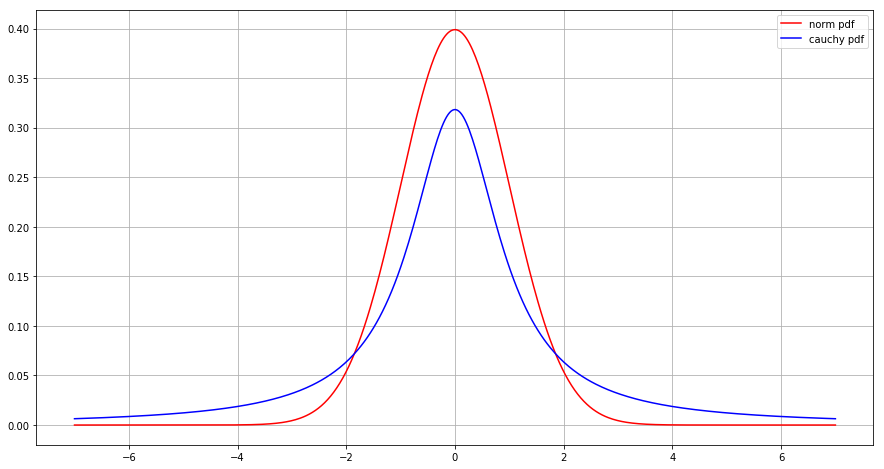

In [185]:
plt.figure(figsize=(15, 8))
grid = np.linspace(-7, 7, 500)
plt.plot(grid, sps.norm.pdf(grid), color='red', label='norm pdf')
plt.plot(grid, sps.cauchy.pdf(grid), color='blue', label='cauchy pdf')
plt.grid(ls='-')
plt.legend()
plt.show()

*b).* Сгенерируйте выборку размера 100 из стандартного распределения Коши. Для всех $n \leqslant 100$ по первым $n$ элементам выборки посчитайте значения $\overline{X}$ и $\widehat{\mu}$ (выборочное среднее и выборочная медиана). На одном графике изобразите зависимость значений этих оценок от $n$. Сделайте вывод.

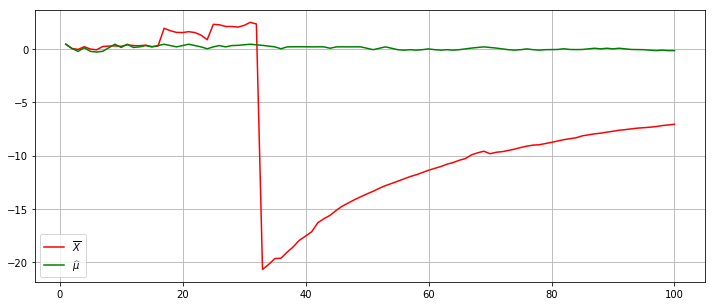

In [186]:
sample = sps.cauchy.rvs(size=100)

cum_mean = sample.cumsum() / np.arange(1, 101)
cum_med = np.array([np.median(sample[:i]) for i in range(1, 101)])

plt.figure(figsize=(12, 5))
plt.plot(np.arange(1, 101), cum_mean, color='red', label='$\\overline{X}$')
plt.plot(np.arange(1, 101), cum_med, color='green', label='$\\widehat{\\mu}$')
plt.grid(ls='-')
plt.legend()
plt.show()

Вывод: Обратим внимание, что графики плотностей стандартного нормального распределения и стандартного распределения Коши похожи, но у Коши более 'тяжелые' хвосты.
Выборочная медиана является состоятельной оценкой для распредения Коши. А вот выборочное среднее не является, в отличие от нормального распределения. Причиной этого являются как раз эти "хвосты".

**Задача 7.** На сегодняшний день возобновляемые источники энергии становятся все более востребованными. К таким источникам относятся, например, ветрогенераторы. Однако, их мощность очень трудно прогнозировать. В частности, выработка энергии при помощи ветрогенераторы сильно зависит от скорости ветра. Поэтому предсказание скорости ветра является очень важной задачей. Скорость ветра часто моделируют с помощью распределения Вейбулла, которое имеет плотность
$$p_\theta(x) = \frac{kx^{k-1}}{\lambda^k} e^{-(x/\lambda)^k},$$
где $\theta = (k, \lambda)$ --- двумерный параметр. К сожалению, найти точную оценку максимального правдоподобия на $\theta$ не получится. В данном задании нужно найти оценку максимального правдоподобия приближенно с помощью поиска по сетке.

*Выборка.* Создайте выборку по значению скорости ветра для некоторой местности для не менее чем 100 дней. Помочь в этом может <a href="https://www.gismeteo.ru/diary/">дневник погоды</a>. Однако, данные там округлены до целого, поэтому вы можете попробовать найти другие данные.

*a).* Найдите оценку максимального правдоподобия параметра $\theta = (k, \lambda)$ с точностью $10^{-5}$ при помощи поиска по двумерной сетке.

За распределение Вейбулла отвечает класс `weibull_min` из `scipy.stats`, которое задается так: `weibull_min(c=`$k$ `, scale=`$\lambda$ `)`.

Двумерную сетку можно создать с помощью `numpy.mgrid[from:to:step, from:to:step]`. Если попробовать сразу создать сетку с шагом $10^{-5},$ то может не хватить памяти. Поэтому найдите сначала максимум по сетке с большим шагом, а потом сделайте сетку с маленьким шагом в окрестности найденной точки. При вычислении без циклов, возможно, придется создавать четырехмерные объекты.

Функция `numpy.argmax` выдает не очень информативный индекс, поэтому пользуйтесь следующей функцией.

In [187]:
def cool_argmax(array):
    return np.unravel_index(np.argmax(array), array.shape)

Нарисуйте график плотности с параметрами, соответствующим найденным ОМП, а так же нанесите на график гистограмму.

In [188]:
...

Ellipsis

*b).*<font size="5" color="red">\*</font> На самом деле, при помощи дифференцирования можно перейти к задаче поиска ОМП для параметра $k$. Выполните такое преобразование и найдите ОМП приближенно с помощью метода Ньютона, основываясь на параграфе 35 книги А.А. Боровкова "Математическая статистика", 2007.

**Задача 8.** 

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Рассмотрим оценки $2\overline{X}, (n+1)X_{(1)}, X_{(1)}+X_{(n)}, \frac{n+1}{n} X_{(n)}$. Вам необходимо сравнить эти оценки в равномерном подходе с квадратичной и линейной функциями потерь, построив графики функций риска при помощи моделирования.

Для каждого $\theta \in (0, 2]$ с шагом 0.01 сгенерируйте 2000 выборок $X_1^j, ..., X_{100}^j$ из распределения $U[0, \theta]$. По каждой из этих выборок посчитайте значение всех четырех оценок. Тем самым для данного $\theta$ и оценки $\theta^*$ получится 2000 реализаций этой оценки $\theta^*_1, ..., \theta^*_{2000}$, где значение $\theta^*_j$ посчитано по реализации выборки $X_1^j, ..., X_{100}^j$. Теперь можно оценить функцию потерь этой оценки с помощью усреднения
$$\widehat{R}\left(\theta^*, \theta\right) = \frac{1}{2000}\sum\limits_{j=1}^{2000} g\left(\theta^*_j, \theta\right),$$
где $g(x, y)=(x-y)^2$ и $g(x, y)=\left|x-y\right|$.

Нанесите на один график все четыре функции риска. Для каждого типа функции потерь должен быть свой график. Пользуйтесь следующим шаблоном. Ограничение сверху по оси *y* ставьте таким, чтобы графики функции риска с малыми значениями четко различались.

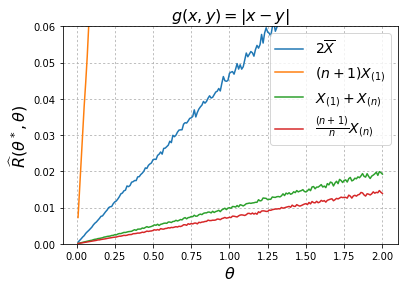

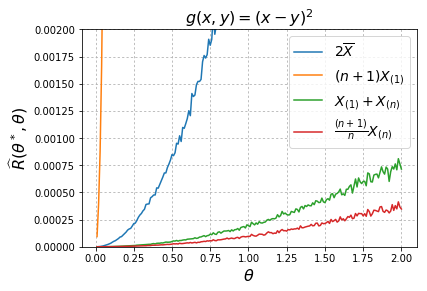

In [189]:
theta = np.linspace(0.01, 2, 200)

sample = sps.uniform.rvs(scale=theta, size=(2000, 100, 200))

estims = np.array([2 * sample.mean(axis=1),
                        101 * sample.min(axis=1),
                        sample.min(axis=1) + sample.max(axis=1),
                        101 / 100 * sample.max(axis=1)])

g_1 = np.empty(shape = (4, 2000, 200))
g_2 = np.empty(shape = (4, 2000, 200))

for i in range(4):
    for j in range(2000):
        for k in range(200):
            g_1[i][j][k], g_2[i][j][k] = [abs(estims[i][j][k] - theta[k]),
                                          (estims[i][j][k] - theta[k]) ** 2]
R_g_1 = g_1.mean(axis = 1)
R_g_2 = g_2.mean(axis = 1)

labels = ['$2 \\overline{X}$', '$(n+1) X_{(1)}$', '$X_{(1)} + X_{(n)}$', '$\\frac{(n+1)}{n}  X_{(n)}$']
ylims = [0.06, 0.002]
titles = ['$g(x,y) = |x-y|$', '$g(x,y) = (x-y)^2$']
Rs = [R_g_1, R_g_2]

for R_g_i, title, ylim in zip(Rs, titles, ylims):
    for R, label in zip(R_g_i, labels):
        plt.plot(theta, R, label=label)
    plt.grid(ls=':')
    plt.xlabel('$\\theta$', fontsize=16)
    plt.ylabel('$\\widehat{R}\\left(\\theta^*, \\theta\\right)$', fontsize=16)
    plt.legend(fontsize=14)
    plt.title(title, fontsize=16)
    plt.ylim((0, ylim))
    plt.show()

Вывод: по построенным графикам видно, что $\frac{n+1}{n} X_{(n)}$ - наилучшая оценка в обоих подходах.

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $Exp(\theta)$. Для $1 \leqslant k \leqslant 5$ рассмотрим оценки $\left(k! / \overline{X^k}\right)^{1/k}$, которые вы получили в домашнем задании. Проведите исследование, аналогичное пункту *a)*. Используйте цикл по $k$, чтобы не размножать код. Факториалы есть гамма-функция, которая реализована в `scipy.special.gamma`.

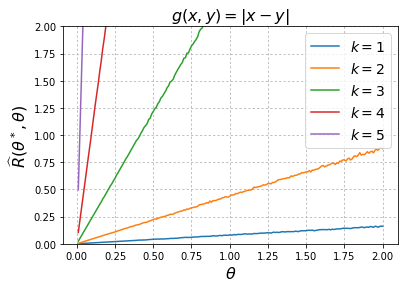

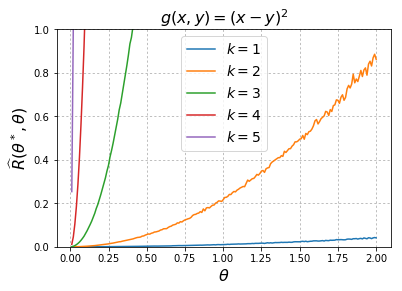

In [190]:
theta = np.linspace(0.01, 2, 200)

sample = sps.expon.rvs(scale = 1 / theta, size=(2000, 100, 200))
estims = np.array([scipy.special.gamma(k + 1) / np.mean(sample ** k, axis=1) ** (1/k) for k in range(1,6)])

g_1 = np.empty(shape = (5, 2000, 200))
g_2 = np.empty(shape = (5, 2000, 200))

for i in range(5):
    for j in range(2000):
        for k in range(200):
            g_1[i][j][k], g_2[i][j][k] = [abs(estims[i][j][k] - theta[k]),
                                          (estims[i][j][k] - theta[k]) ** 2]
R_g_1 = g_1.mean(axis = 1)
R_g_2 = g_2.mean(axis = 1)

labels = ['$k = 1$', '$k = 2$', '$k = 3$', '$k = 4$', '$k = 5$']
ylims = [2, 1]
titles = ['$g(x,y) = |x-y|$', '$g(x,y) = (x-y)^2$']
Rs = [R_g_1, R_g_2]

for R_g_i, title, ylim in zip(Rs, titles, ylims):
    for R, label in zip(R_g_i, labels):
        plt.plot(theta, R, label=label)
    plt.grid(ls=':')
    plt.xlabel('$\\theta$', fontsize=16)
    plt.ylabel('$\\widehat{R}\\left(\\theta^*, \\theta\\right)$', fontsize=16)
    plt.legend(fontsize=14)
    plt.title(title, fontsize=16)
    plt.ylim((0, ylim))
    plt.show()

Вывод: по построенным графикам видно, что $\left(k! / \overline{X^k}\right)^{1/k}$, где $k = 1$ - наилучшая оценка в обоих подходах.

**Задача 9<font size="5" color="red">\*</font>.** Пусть $\theta^*$ --- оценка параметра $\theta$ и $R\left(\theta^*, \theta\right) = \mathsf{E}_{\theta} \left(\theta^* - \theta\right)^2$ --- функция риска с квадратичной функцией потерь. Тогда справедливо bias-variance разложение
$$R\left(\theta^*, \theta\right) = bias^2(\theta^*, \theta) + variance(\theta^*, \theta) ,$$
$$bias(\theta^*, \theta) = \mathsf{E}_{\theta} \theta^* - \theta,$$
$$variance(\theta^*, \theta) = \mathsf{D}_{\theta} \theta^*.$$

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Рассмотрим класс оценок $\mathscr{K} = \left\{cX_{(n)}, c\in\mathbb{R}\right\}$. Выпишите bias-variance разложение для таких оценок.

...

Заметим, что каждая компонента bias-variance разложения пропорциональна $\theta^2$. Это означает, достаточно рассмотреть поведение компонент при изменении $c$ только для одного значения $\theta$.

Постройте график зависимости компонент bias-variance разложения от $c$ для $n=5$ и $\theta=1$. С помощью функций `plt.xlim` и `plt.ylim` настройте видимую область графика так, чтобы четко была отобажена информативная часть графика (по оси *x* примерно от 0.9 до 1.3). Не забудьте добавить сетку и легенду, а так же подписать оси.

Сделайте выводы. Какая $c$ дает минимум функции риска? Является ли соответствующая оценка смещеной? Что можно сказать про несмещенную оценку?

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(0, \sigma^2)$. Рассмотрим класс оценок $\mathscr{K} = \left\{\frac{1}{c}\sum\limits_{i=1}^n \left(X_i - \overline{X}\right)^2, c\in\mathbb{R}\right\}$. Выпишите bias-variance разложение для таких оценок. Можно использовать то, что величина $\frac{nS^2}{\sigma^2}$ имеет распределение хи-квадрат с $n-1$ степенью свободы (это будет доказано в нашем курсе позже) и ее дисперсия равна $2(n-1)$.

...

Повторите исследование, аналогичное пункту *a)* для $sigma^2 = 1$ и $n \in \{5, 10\}$. Для экономии места нарисуйте два графика в строчку. Не забудьте сделать выводы.

**Задача 10<font size="5" color="red">\*</font>.** Разберитесь с теорией параграфа 4 главы 6 книжки М.Б. Лагутина "Наглядная математическая статистика", 2009. Проведите соответствующее исследование.